Basic Statistics:

    Total Kills (K) per player. (By scope, by side, ) 
    Total Deaths (D) per player.
    Kill/Death ratio (K/D) per player.
    Average Combat Score (ACS) per player.
    Average Damage per Round (ADR) per player.

Performance Metrics:

    Headshot Percentage (HS%) per player.
    First Kills (FK) and First Deaths (FD) counts and ratios.
    Kill/Death difference (+/-) per player.
    Kill/Death difference in pistol rounds (+/-) per player.

Agent-Specific Metrics:

    Agent popularity and performance analysis.
    Win rates and performance on specific maps for each agent.

Team Performance:

    Total team Kills, Deaths, and K/D ratio.
    Team Average Combat Score (ACS) and Average Damage per Round (ADR).
    Team First Kills (FK) and First Deaths (FD) counts and ratios.

Map Performance:

    Individual player performance on each map.
    Team performance on each map.
    Win rates on each map.

Stage and Series Analysis:

    Performance in different stages (e.g., Playoffs, Grand Final).
    Series-level statistics and win rates.

Comparative Analysis:

    Compare individual player statistics against the team average.
    Compare agent performance across players.

Trend Analysis:

    Analyze how player performance changes over different maps or series.
    Identify trends in individual player K/D ratios.

Impact Analysis:

    Assess the impact of individual player performance on team success.


In [8]:
import pandas as pd
import ast

data = pd.read_csv('champions-tour-2024-pacific-kickoff_data\economy_data_champions-tour-2024-pacific-kickoff.csv')
general = pd.read_csv('champions-tour-2024-americas-kickoff_data\general_data_champions-tour-2024-americas-kickoff.csv')
economy = pd.read_csv('champions-tour-2024-emea-kickoff_data\economy_data_champions-tour-2024-emea-kickoff.csv')
performance = pd.read_csv('champions-tour-2024-americas-kickoff_data\performance_data_champions-tour-2024-americas-kickoff.csv')
pick_ban = pd.read_csv('champions-tour-2024-emea-kickoff_data\pick_ban_data_champions-tour-2024-emea-kickoff.csv')


In [13]:
general

,Player Name,Agent Name,R,ACS,K,D,K/D +/–,+/–,ADR,HS%,...,FK/FD +/–,+/–.1,Team Name,Map Name,Map #,Stage,Series,winner,rounds,Id
0,Victor,Cypher,1.26\n1.49\n1.05,218\n268\n173,18\n11\n7,\n\n13\n7\n6\n\n,7\n3\n4,+5\n+4\n+1,139\n162\n119,38%\n35%\n44%,...,1\n1\n0,+3\n+1\n+2,NRG Esports,Breeze,1,Group Stage,Opening (A),NRG Esports,"0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1...",1
1,Ethan,Kayo,1.24\n0.75\n1.68,205\n157\n250,17\n6\n11,\n\n13\n8\n5\n\n,14\n6\n8,+4\n-2\n+6,139\n100\n175,32%\n23%\n40%,...,2\n1\n1,-2\n-1\n-1,NRG Esports,Breeze,1,Group Stage,Opening (A),NRG Esports,"0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1...",1
2,crashies,Sova,1.12\n1.09\n1.15,200\n263\n144,16\n10\n6,\n\n13\n8\n5\n\n,7\n3\n4,+3\n+2\n+1,136\n181\n95,35%\n38%\n31%,...,0\n0\n0,+2\n0\n+2,NRG Esports,Breeze,1,Group Stage,Opening (A),NRG Esports,"0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1...",1
3,Demon1,Jett,1.10\n0.87\n1.32,238\n173\n298,19\n6\n13,\n\n17\n9\n8\n\n,4\n4\n0,+2\n-3\n+5,155\n111\n194,26%\n11%\n40%,...,3\n2\n1,+5\n+2\n+3,NRG Esports,Breeze,1,Group Stage,Opening (A),NRG Esports,"0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1...",1
4,Marved,Viper,0.90\n0.57\n1.20,187\n127\n243,16\n5\n11,\n\n17\n9\n8\n\n,6\n1\n5,-1\n-4\n+3,141\n107\n172,33%\n29%\n36%,...,2\n1\n1,-1\n-1\n0,NRG Esports,Breeze,1,Group Stage,Opening (A),NRG Esports,"0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,zekken,Raze,1.39\n1.55\n1.01,307\n361\n181,18\n15\n3,\n\n13\n9\n4\n\n,8\n6\n2,+5\n+6\n-1,205\n231\n143,22%\n26%\n13%,...,2\n0\n2,+2\n+3\n-1,Sentinels,Lotus,5,Playoffs,Grand Final,Sentinels,"1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1",19
456,Sacy,Fade,1.23\n1.44\n0.71,247\n307\n106,14\n15\n-1,\n\n12\n7\n5\n\n,15\n8\n7,+2\n+8\n-6,181\n220\n86,28%\n31%\n13%,...,0\n0\n0,0\n0\n0,Sentinels,Lotus,5,Playoffs,Grand Final,Sentinels,"1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1",19
457,johnqt,Viper,1.18\n1.12\n1.30,229\n244\n195,16\n11\n5,\n\n12\n9\n3\n\n,5\n4\n1,+4\n+2\n+2,152\n159\n135,38%\n33%\n50%,...,0\n0\n0,0\n0\n0,Sentinels,Lotus,5,Playoffs,Grand Final,Sentinels,"1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1",19
458,TenZ,Omen,1.12\n0.91\n1.61,239\n185\n370,14\n7\n7,\n\n14\n9\n5\n\n,9\n5\n4,0\n-2\n+2,141\n118\n197,20%\n20%\n19%,...,3\n3\n0,+2\n+1\n+1,Sentinels,Lotus,5,Playoffs,Grand Final,Sentinels,"1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1",19


In [10]:
from utils import *

data_round = general.drop_duplicates(['Stage', 'Series','Team Name', 'Map #'])[['Stage', 'Series', 'Map #','Team Name', 'rounds', 'winner']]
data_round['rounds'] = data_round['rounds'].apply(lambda x: list(map(int, x.split(', '))))
data_round['total_rounds'] = data_round['rounds'].apply(lambda x: sum(x))


In [17]:
t = data_round.head(87)
t.to_csv('C:\\Users\\mariu\\Downloads\\test.csv')

In [12]:
for i in range(0,len(data_round)-1,2):
    print(i)

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84


In [ ]:
map_winners = set_map_winner(data_round)
win_rates = {team : round(len(map_winners[map_winners['Team Name'] == team].where(map_winners['Team Name'] == map_winners['map_winners']).dropna()) / len(map_winners[map_winners['Team Name'] == team].dropna()),2) for team in list(set(general['Team Name']))}

In [9]:

t = calculate_win_rate(general,'map')

87
86


ValueError: Length of values (86) does not match length of index (87)

In [31]:
from utils import *
performance.replace(pd.NA, '[]', inplace=True)
names = set(performance['Player Name'])


In [65]:
import numpy as np
performance.replace(np.nan, '[]', inplace=True)

In [66]:
total_2K, total_3K, total_4K, total_5K, total_1v1, total_1v2, total_1v3, total_1v4, total_1v5 = total_individual_exploit(performance)

In [41]:
test = calculate_win_rate(general,scope='map')

In [52]:
def replace_team_names(df):
    # Replace 'Movistar KOI\t\t\t\t\t\t\n\t\t\t\t\t\t\t(KOI)' with 'Movistar KOI'
    df['Team Name'] = df['Team Name'].replace('Movistar KOI\t\t\t\t\t\t\n\t\t\t\t\t\t\t(KOI)', 'Movistar KOI')
    # Replace 'KOI' with 'Movistar KOI'
    df['Team Name'] = df['Team Name'].replace('KOI', 'Movistar KOI')
    return df

In [53]:
general = replace_team_names(general)

In [54]:
set(general['Team Name'])

{'BBL Esports',
 'FNATIC',
 'FUT Esports',
 'GIANTX',
 'Gentle Mates',
 'Karmine Corp',
 'Movistar KOI',
 'Natus Vincere',
 'Team Heretics',
 'Team Liquid',
 'Team Vitality'}

In [61]:
general.to_csv('champions-tour-2024-emea-kickoff_data\general_data_champions-tour-2024-emea-kickoff.csv', index=False)

In [ ]:
total_1v5 = {name : ( performance[performance['Player Name'] == name]['Team Name'].iloc[0], performance[performance['Player Name'] == name]['1v5'].apply(lambda x: len(ast.literal_eval(x))).sum()) for name in names}

Content Exploration

In [7]:
reyk2021 = ['Americas','EMEA','Pacific','EMEA']
BerlinM2021 = ['EMEA','Americas','Americas','EMEA']
BerlinC2021 = ['EMEA','EMEA','EMEA','Americas']
reyk2022 = ['Americas','Americas','Pacific','Pacific']
Cop2022 = ['EMEA','Pacific','Americas','EMEA']
Istanbul2022 = ['Americas','Americas','Pacific','EMEA']
LockIn2023 = ['EMEA','Americas','Pacific','EMEA']
Tokyo2023 = ['EMEA','Americas','Pacific','Americas']
Champs2023 = ['Americas','Pacific','Americas','EMEA']
Madrid2024 = ['Americas','Pacific','Pacific','Americas']


In [18]:
from collections import defaultdict

# Combine all the lists into one
all_lists = [Istanbul2022,LockIn2023, Tokyo2023, Champs2023, Madrid2024]

# Create a dictionary to store the ranks for each region
region_ranks = defaultdict(list)

# Assign ranks to each occurrence of the regions in the lists
for idx, lst in enumerate(all_lists):
    for rank, region in enumerate(lst, start=1):
        region_ranks[region].append(rank)

# Calculate the average rank for each region
average_ranks = {region: sum(ranks) / len(ranks) for region, ranks in region_ranks.items()}

# Print the average rank for each region
for region, average_rank in average_ranks.items():
    print(f"Average rank for {region}: {average_rank}")

Average rank for Americas: 2.2222222222222223
Average rank for Pacific: 2.6666666666666665
Average rank for EMEA: 2.8


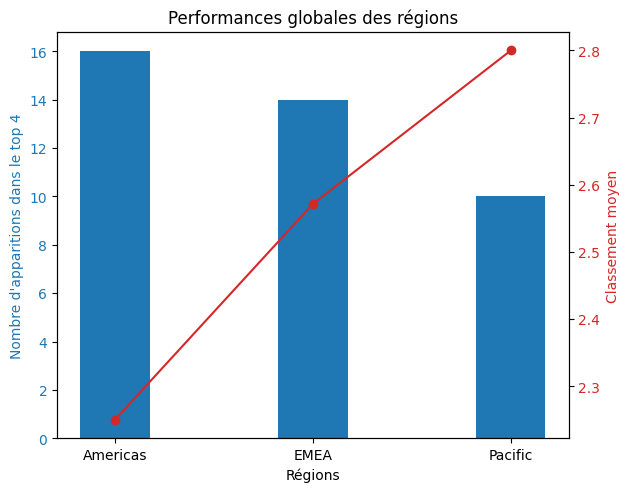

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Listes des classements pour chaque événement
classements = {
    "reyk2021": ['Americas','EMEA','Pacific','EMEA'],
    "BerlinM2021": ['EMEA','Americas','Americas','EMEA'],
    "BerlinC2021": ['EMEA','EMEA','EMEA','Americas'],
    "reyk2022": ['Americas','Americas','Pacific','Pacific'],
    "Cop2022": ['EMEA','Pacific','Americas','EMEA'],
    "Istanbul2022": ['Americas','Americas','Pacific','EMEA'],
    "LockIn2023": ['EMEA','Americas','Pacific','EMEA'],
    "Tokyo2023": ['EMEA','Americas','Pacific','Americas'],
    "Champs2023": ['Americas','Pacific','Americas','EMEA'],
    "Madrid2024": ['Americas','Pacific','Pacific','Americas']
}

# Initialisation des comptEMEArs pour chaque région
performances = {"Americas": {"apparitions": 0, "classement_total": 0},
                "EMEA": {"apparitions": 0, "classement_total": 0},
                "Pacific": {"apparitions": 0, "classement_total": 0}}

# Calcul des performances pour chaque événement
for event in classements.values():
    for i, region in enumerate(event):
        performances[region]["apparitions"] += 1
        performances[region]["classement_total"] += i + 1

# Calcul du classement moyen pour chaque région
for region, data in performances.items():
    data["classement_moyen"] = data["classement_total"] / data["apparitions"]

# Création du plot
regions = list(performances.keys())
apparitions = [performances[region]["apparitions"] for region in regions]
classement_moyen = [performances[region]["classement_moyen"] for region in regions]

x = np.arange(len(regions))
width = 0.35

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Régions')
ax1.set_ylabel('Nombre d\'apparitions dans le top 4', color=color)
ax1.bar(x, apparitions, width, color=color, label='Apparitions dans le top 4')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Classement moyen', color=color)
ax2.plot(x, classement_moyen, color=color, marker='o', label='Classement moyen')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.xticks(x, regions)
plt.title('Performances globales des régions')
plt.show()


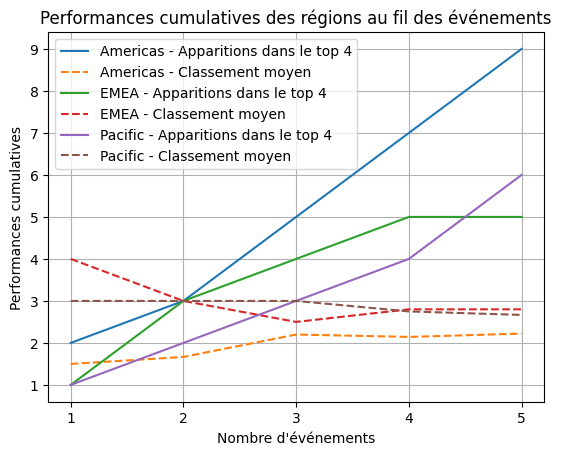

In [20]:
import matplotlib.pyplot as plt

# Listes des classements pour chaque événement
classements = {
    "reyk2021": ['Americas','EMEA','Pacific','EMEA'],
    "BerlinM2021": ['EMEA','Americas','Americas','EMEA'],
    "BerlinC2021": ['EMEA','EMEA','EMEA','Americas'],
    "reyk2022": ['Americas','Americas','Pacific','Pacific'],
    "Cop2022": ['EMEA','Pacific','Americas','EMEA'],
    "Istanbul2022": ['Americas','Americas','Pacific','EMEA'],
    "LockIn2023": ['EMEA','Americas','Pacific','EMEA'],
    "Tokyo2023": ['EMEA','Americas','Pacific','Americas'],
    "Champs2023": ['Americas','Pacific','Americas','EMEA'],
    "Madrid2024": ['Americas','Pacific','Pacific','Americas']
}

# Listes des classements pour chaque événement
classements_recent = {
    "Istanbul2022": ['Americas','Americas','Pacific','EMEA'],
    "LockIn2023": ['EMEA','Americas','Pacific','EMEA'],
    "Tokyo2023": ['EMEA','Americas','Pacific','Americas'],
    "Champs2023": ['Americas','Pacific','Americas','EMEA'],
    "Madrid2024": ['Americas','Pacific','Pacific','Americas']
}

# Initialisation des comptEMEArs cumulatifs pour chaque région
performances_cumulatives = {"Americas": {"apparitions": 0, "classement_total": 0},
                            "EMEA": {"apparitions": 0, "classement_total": 0},
                            "Pacific": {"apparitions": 0, "classement_total": 0}}

# Liste pour stocker les performances cumulatives à chaque événement
performances_cumulatives_list = []

# Calcul des performances cumulatives pour chaque événement
for event in classements_recent.values():
    for i, region in enumerate(event):
        performances_cumulatives[region]["apparitions"] += 1
        performances_cumulatives[region]["classement_total"] += i + 1
        
    # Ajouter les performances cumulatives actuelles à la liste
    performances_cumulatives_list.append({region: data.copy() for region, data in performances_cumulatives.items()})

# Création du plot
x = range(1, len(performances_cumulatives_list) + 1)

for region in performances_cumulatives_list[0]:
    apparitions = [data[region]["apparitions"] for data in performances_cumulatives_list]
    classement_moyen = [(data[region]["classement_total"] / data[region]["apparitions"]) if data[region]["apparitions"] > 0 else 0 for data in performances_cumulatives_list]
    plt.plot(x, apparitions, label=f"{region} - Apparitions dans le top 4")
    plt.plot(x, classement_moyen, linestyle='--', label=f"{region} - Classement moyen")

plt.xlabel('Nombre d\'événements')
plt.ylabel('Performances cumulatives')
plt.title('Performances cumulatives des régions au fil des événements')
plt.legend()
plt.xticks(x)
plt.grid(True)
plt.show()
